In [11]:
#%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.collections as collections
import scipy.io as sio
import numpy as np
import pandas as pd

from utils.vad import VAD
from hmmlearn_YG import hmm
from python_speech_features import mfcc
from utils.utils import predict_voice_state, load_voice_testing

In [12]:
subject = "R031"
syllable = sio.loadmat('Data/%s/syllable1.mat' % subject)

In [13]:
# Load all raw data values for vowels
Tmp_Data = syllable['data']
Start = syllable['datastart']
End = syllable['dataend']
Sample_Rate = syllable['samplerate']

sample_rate = int(Sample_Rate[4,0])
sample_len  = int(End[4,0] - Start[4,0] + 1)
print("Sample Rate: ", sample_rate)
print("Signal Length: ", sample_len)

Sample Rate:  20000
Signal Length:  120000


In [14]:
# combine both channel voices
voice_sample_channel = np.zeros((sample_len, 2))

# For the left channel
voice_start = int(Start[4,0]) - 1
voice_end = int(End[4,0])
voice_sample_tmp = Tmp_Data[0,voice_start:voice_end]
voice_sample_channel[:,0] = voice_sample_tmp - np.mean(voice_sample_tmp)

# For the right channel
voice_start = int(Start[5,0]) - 1
voice_end = int(End[5,0])
voice_sample_tmp = Tmp_Data[0,voice_start:voice_end]
voice_sample_channel[:,1] = voice_sample_tmp - np.mean(voice_sample_tmp)

voice_sample = np.mean(voice_sample_channel, axis=1, 
                       dtype=voice_sample_channel.dtype)

In [33]:
# Voice activity detection
vad = VAD(voice_sample, sample_rate, nFFT=512, win_length=0.025, hop_length=0.01, theshold=0.93)

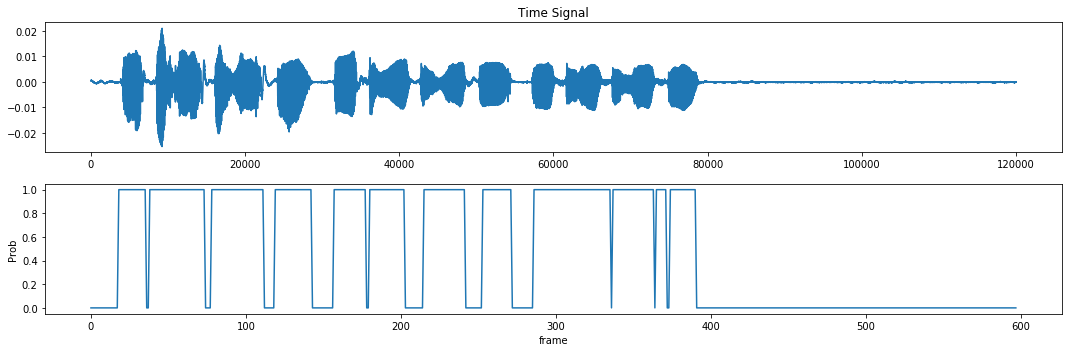

In [34]:
plt.figure(figsize=(15,5))
plt.subplot(2, 1, 1)
plt.plot(voice_sample)
plt.title('Time Signal')

plt.subplot(2, 1, 2)
plt.plot(vad)
plt.xlabel('frame')
plt.ylabel('Prob')

plt.tight_layout()
plt.show()